# Assignment 1


_loading the dataset and getting a preliminary information about the data_

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import random


## Preliminary data analayse

In [95]:
iris = pd.read_csv('iris.csv')
estimator = LogisticRegression()
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [96]:
   print(f'Featurs: {list(iris.columns)[:-1]},  Target: \'{iris.columns[-1]}\'')

Featurs: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],  Target: 'species'


In [97]:
species = iris.groupby(['species'])
stats = iris.describe(percentiles = [])
stats

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
50%,5.800000,3.000000,4.350000,1.300000
max,7.900000,4.400000,6.900000,2.500000


### 'Sepal' analysis

In [98]:
sepal = species[['sepal_length', 'sepal_width']]
sepal_stats = sepal.describe(percentiles=[])
sepal_stats.rename(columns = {'50%':'median', 'std':'standard deviation'},inplace = True)
sepal_stats

sepal_length                                             \
                  count   mean standard deviation  min median  max   
species                                                              
setosa             50.0  5.006           0.352490  4.3    5.0  5.8   
versicolor         50.0  5.936           0.516171  4.9    5.9  7.0   
virginica          50.0  6.588           0.635880  4.9    6.5  7.9   

           sepal_width                                             
                 count   mean standard deviation  min median  max  
species                                                            
setosa            50.0  3.418           0.381024  2.3    3.4  4.4  
versicolor        50.0  2.770           0.313798  2.0    2.8  3.4  
virginica         50.0  2.974           0.322497  2.2    3.0  3.8

### 'Petal' analyis

In [99]:
petal = species['petal_length', 'petal_width']
petal_stats = petal.describe(percentiles=[])
petal_stats.rename(columns = {'50%':'median', 'std':'standard deviation'}, inplace = True)
petal_stats

C:\Users\97250\AppData\Local\Temp\ipykernel_8016\3210393297.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  petal = species['petal_length', 'petal_width']


petal_length                                             \
                  count   mean standard deviation  min median  max   
species                                                              
setosa             50.0  1.464           0.173511  1.0   1.50  1.9   
versicolor         50.0  4.260           0.469911  3.0   4.35  5.1   
virginica          50.0  5.552           0.551895  4.5   5.55  6.9   

           petal_width                                             
                 count   mean standard deviation  min median  max  
species                                                            
setosa            50.0  0.244           0.107210  0.1    0.2  0.6  
versicolor        50.0  1.326           0.197753  1.0    1.3  1.8  
virginica         50.0  2.026           0.274650  1.4    2.0  2.5

### Petal and Sepal

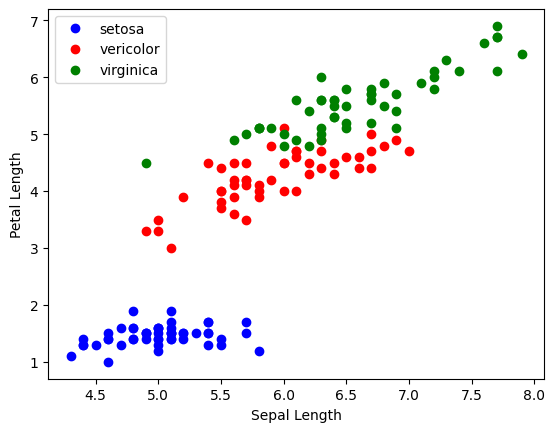

In [100]:
plt.plot(iris['sepal_length'][:50], iris['petal_length'][:50],'bo')
plt.plot(iris['sepal_length'][50:100], iris['petal_length'][50:100],'ro')
plt.plot(iris['sepal_length'][100:150], iris['petal_length'][100:150],'go')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(['setosa', 'vericolor', 'virginica'])

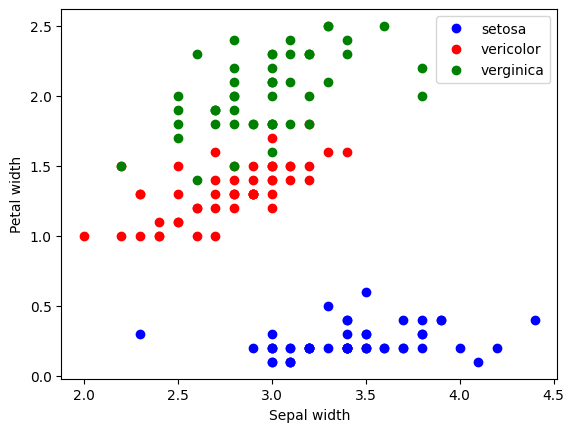

In [101]:
plt.plot(iris['sepal_width'][:50],iris['petal_width'][:50], 'bo')
plt.plot(iris['sepal_width'][50:100],iris['petal_width'][50:100], 'ro')
plt.plot(iris['sepal_width'][100:150], iris['petal_width'][100:150], 'go')
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend(['setosa', 'vericolor', 'verginica'])
plt.show()

In [102]:

ratios = np.arange(0.1,1,0.1)
def train_test_ratio(df):
    X, y = df.to_numpy()[:, :-1], df.to_numpy()[:, -1:]    # split features and lables
    accuracies = []
    for r in ratio:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = r)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        estimator.fit(X_train, y_train.ravel())
        y_pred = estimator.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    plt.plot(ratios, accuracies)
    plt.xlabel("Ratio")
    plt.ylabel("Accuracy")
    for i in range(9):
        print(f'ratio: {round(ratios[i], 1)}, accuracy: {accuracies[i]}');
    


## Train and test the iris dataset

ratio: 0.1, accuracy: 1.0
ratio: 0.2, accuracy: 0.9666666666666667
ratio: 0.3, accuracy: 0.9782608695652174
ratio: 0.4, accuracy: 0.95
ratio: 0.5, accuracy: 0.9733333333333334
ratio: 0.6, accuracy: 0.9555555555555556
ratio: 0.7, accuracy: 0.8867924528301887
ratio: 0.8, accuracy: 0.8666666666666667
ratio: 0.9, accuracy: 0.8592592592592593


Text(0.5, 1.0, 'Balanced dataset')

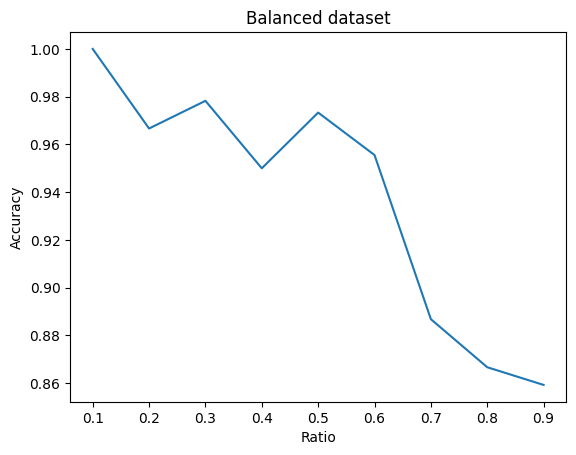

In [103]:
train_test_ratio(iris)
plt.title('Balanced dataset')

#### Find label with minimum apearences

In [104]:
df_setosa = iris[iris['species'] == 'setosa']
df_versicolor = iris[iris['species'] == 'versicolor']
df_virginica = iris[iris['species'] == 'virginica']
rand = random.randint(0,149)
l_min = iris['species'][rand]
rand_int = random.randint(30,40)
l_min_count = 50 - rand_int
l_min = iris['species'][rand]
print(f'The label with the smallest rate apperance is: {l_min} with {l_min_count} samples')   
    

The label with the smallest rate apperance is: virginica with 19 samples


#### Creating the dataset

In [105]:
df_setosa = df_setosa.head(l_min_count)
df_versicolor = df_versicolor.head(l_min_count)
df_virginica = df_virginica.head(l_min_count)
df_balanced = pd.concat([df_setosa,df_versicolor,df_virginica])
df_balanced.groupby(['species']).count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,19,19,19,19
versicolor,19,19,19,19
virginica,19,19,19,19


## Training the new balanced (but smaller) dataset

ratio: 0.1, accuracy: 1.0
ratio: 0.2, accuracy: 1.0
ratio: 0.3, accuracy: 1.0
ratio: 0.4, accuracy: 1.0
ratio: 0.5, accuracy: 0.9310344827586207
ratio: 0.6, accuracy: 1.0
ratio: 0.7, accuracy: 0.8
ratio: 0.8, accuracy: 0.8695652173913043
ratio: 0.9, accuracy: 0.6153846153846154


(57, 5)

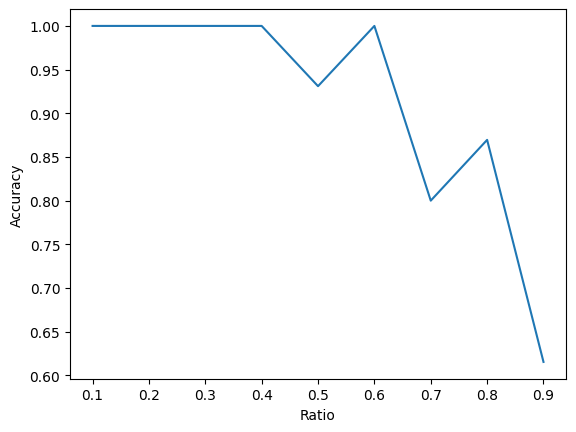

In [115]:
train_test_ratio(df_balanced)
df_balanced.shape